In [61]:
import numpy as np
import rasterio
from rasterio.plot import show

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

In [2]:
pixeles = []
etiquetas = []

In [3]:
directorio_coberturas = r"C:\Users\JuanMa\Google Drive\Mis Videos en Youtube\Analisis Raster con Python\03 - Clasificación de imágenes satelitales con técnicas de Machine Learning\Entrenamiento"

In [13]:
for cobertura in range(1, 4):
    carpeta = directorio_coberturas + '\\Cobertura_' + str(cobertura)
    for muestra in range(1, 8):
        archivo = carpeta + '\\muestra' + str(muestra) + '.tif'
        with rasterio.open(archivo) as muestra_entrenamiento:
            imagen = muestra_entrenamiento.read()
            imagen = imagen.reshape((imagen.shape[0], -1)).T
            pixeles.extend(imagen)
            etiquetas.extend([cobertura] * imagen.shape[0])

In [16]:
pixeles = np.array(pixeles)
etiquetas = np.array(etiquetas)

In [20]:
pixeles_entrenamiento, pixeles_test, etiquetas_entrenamiento, etiquetas_test = train_test_split(pixeles, etiquetas, test_size = 0.20)

In [22]:
scaler = StandardScaler()

In [23]:
scaler.fit(pixeles_entrenamiento)
pixeles_entrenamiento = scaler.transform(pixeles_entrenamiento)
pixeles_test = scaler.transform(pixeles_test)

In [26]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(pixeles_entrenamiento, etiquetas_entrenamiento)

KNeighborsClassifier()

In [27]:
directorio_imagen_satelital = r"C:\Users\JuanMa\Google Drive\Mis Videos en Youtube\Analisis Raster con Python\03 - Clasificación de imágenes satelitales con técnicas de Machine Learning\LC09_L2SP_008057_20230203_20230311_02_T1_MTL.tif"

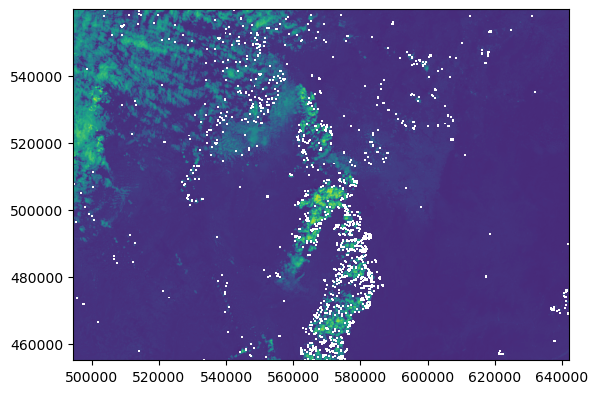

<AxesSubplot: >

In [30]:
imagen_satelital = rasterio.open(directorio_imagen_satelital)
show(imagen_satelital)

In [31]:
with rasterio.open(directorio_imagen_satelital) as imagen_satelital:
    imagen_a_clasificar = imagen_satelital.read()
    
    metadata_original = imagen_satelital.profile

In [33]:
imagen_a_clasificar = imagen_a_clasificar.reshape((imagen_a_clasificar.shape[0], -1)).T
imagen_a_clasificar = scaler.transform(imagen_a_clasificar)

In [35]:
imagen_clasificada_knn = knn.predict(imagen_a_clasificar)

In [50]:
imagen_clasificada_knn = imagen_clasificada_knn.reshape((metadata_original['height'], metadata_original['width']))

In [51]:
directorio_imagen_satelital_clasificada = r'C:\Users\JuanMa\Google Drive\Mis Videos en Youtube\Analisis Raster con Python\03 - Clasificación de imágenes satelitales con técnicas de Machine Learning\imagen_clasificada_knn.tif'

In [52]:
metadata_original.update(count = 1, dtype = rasterio.int32)

In [53]:
with rasterio.open(directorio_imagen_satelital_clasificada, 'w', **metadata_original) as imagen_satelital:
    imagen_satelital.write(imagen_clasificada_knn.astype(rasterio.int32), 1)

In [54]:
with rasterio.open(directorio_imagen_satelital_clasificada) as imagen_clasificada_knn:
    imagen_knn = imagen_clasificada_knn.read(1)

In [58]:
colores = ['orange', 'gray', 'blue']
rampa_de_colores = mcolors.ListedColormap(colores)

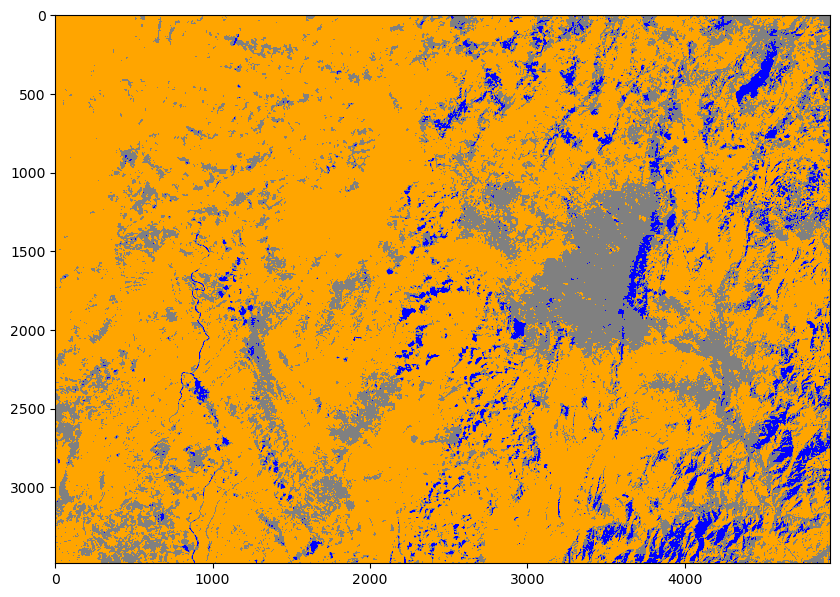

In [59]:
fig, ax = plt.subplots(figsize = (10, 10))
img = ax.imshow(imagen_knn, cmap = rampa_de_colores)

In [62]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(pixeles_entrenamiento, etiquetas_entrenamiento)

RandomForestClassifier(random_state=42)

In [63]:
imagen_clasificada_rf = rf.predict(imagen_a_clasificar)

In [64]:
imagen_clasificada_rf = imagen_clasificada_rf.reshape((metadata_original['height'], metadata_original['width']))

In [65]:
directorio_imagen_satelital_clasificada = r'C:\Users\JuanMa\Google Drive\Mis Videos en Youtube\Analisis Raster con Python\03 - Clasificación de imágenes satelitales con técnicas de Machine Learning\imagen_clasificada_rf.tif'

In [66]:
metadata_original.update(count = 1, dtype = rasterio.int32)

In [67]:
with rasterio.open(directorio_imagen_satelital_clasificada, 'w', **metadata_original) as imagen_satelital:
    imagen_satelital.write(imagen_clasificada_rf.astype(rasterio.int32), 1)

In [69]:
with rasterio.open(directorio_imagen_satelital_clasificada) as imagen_clasificada_rf:
    imagen_rf = imagen_clasificada_rf.read(1)

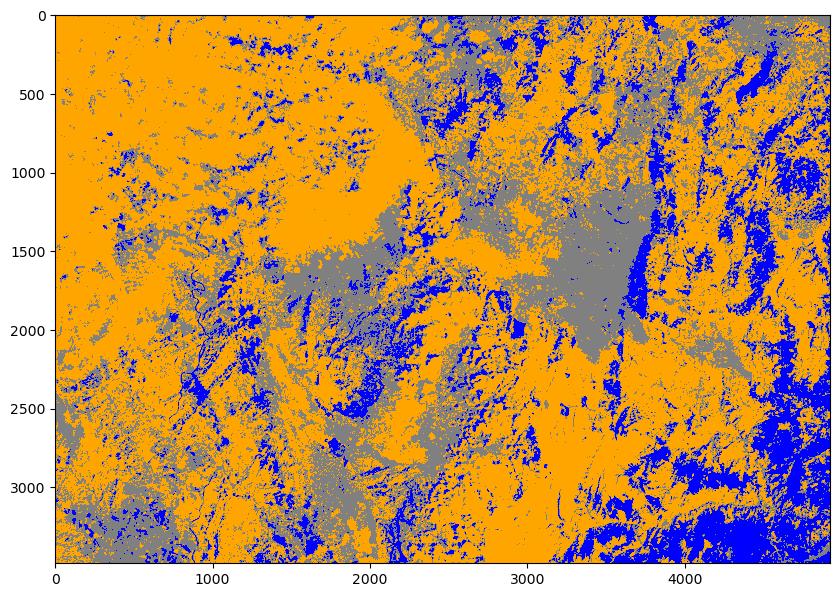

In [70]:
fig, ax = plt.subplots(figsize = (10, 10))
img = ax.imshow(imagen_rf, cmap = rampa_de_colores)

In [72]:
svm = SVC(kernel = 'rbf', random_state = 42)
svm.fit(pixeles_entrenamiento, etiquetas_entrenamiento)

SVC(random_state=42)

In [73]:
imagen_clasificada_svm = svm.predict(imagen_a_clasificar)

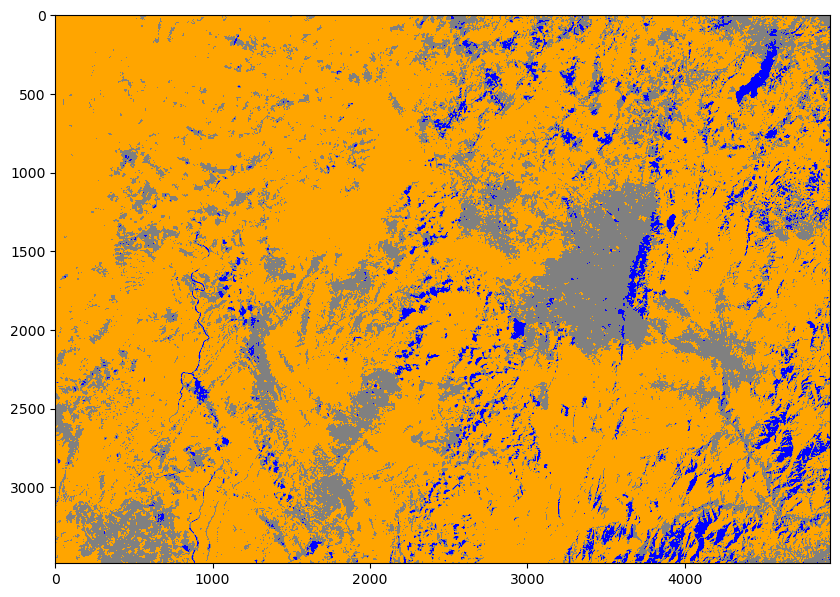

In [74]:
imagen_clasificada_svm = imagen_clasificada_svm.reshape((metadata_original['height'], metadata_original['width']))
directorio_imagen_satelital_clasificada = r'C:\Users\JuanMa\Google Drive\Mis Videos en Youtube\Analisis Raster con Python\03 - Clasificación de imágenes satelitales con técnicas de Machine Learning\imagen_clasificada_svm.tif'

with rasterio.open(directorio_imagen_satelital_clasificada, 'w', **metadata_original) as imagen_satelital:
    imagen_satelital.write(imagen_clasificada_svm.astype(rasterio.int32), 1)

with rasterio.open(directorio_imagen_satelital_clasificada) as imagen_clasificada_svm:
    imagen_svm = imagen_clasificada_svm.read(1)

fig, ax = plt.subplots(figsize = (10, 10))
img = ax.imshow(imagen_svm, cmap = rampa_de_colores)